# SIS 2 (6 points)

Deadline for submission : **Monday 24th March : 23h50**

- The defense for this SIS will take place next week on **February 27 and March 1**.  
- During the defense, I will ask you to explain your solutions, and you may also receive additional questions.  
- If you are working in a group of two and are not from the same practical class, please contact me in advance to schedule your defense during office hours.  
- Unjustified absences will result in a zero for the assignment, even if you have completed and submitted your work.  


**THE CODE SHOULD BE RUN AND RESULTS NOT CLEARED**

---

## Exercise 1 : Gauss-Markov Assumptions

- **This exercise should be solved on PAPER (and photo or scan should be send).**

- Proofs should be DETAILED (otherwise they aren't proofs...). 





Consider the multi-linear model:

$
y_i = X \beta + \epsilon_i
$

where:
- $y_i$ is an $(n \times 1)$ vector of observations,
- $X$ is an $(n \times k)$ matrix of independent variables,
- $\beta$ is a $(k \times 1)$ vector of parameters,
- $\epsilon_i$ is an $(n \times 1)$ vector of error terms.

And the OLS estimator $\hat{\beta} = (X'X)^{-1} X'y$


---
#### 1. What does the Gauss-Markov theorem states ?

---
#### 2. Which assumptions do you need in order to show that $\hat{\beta}$ is identified? Show identification.

---
#### 3. Show that $\hat{\beta}$ is unbiased, 

i.e., $\mathbb{E}[\hat{\beta}] = \beta$.

---
#### 4. Prove that $\operatorname{Var}(\hat{\beta}) = \sigma^2 (X'X)^{-1}$.

---
#### 5. Efficiency of $\hat{\beta}$ and the Gauss-Markov Theorem  

Let $\tilde{\beta}$ be another **linear and unbiased** estimator of $\beta$. That is,  


$\tilde{\beta} = Ay$


for some matrix $A$ such that $\mathbb{E}[\tilde{\beta}] = \beta$.  

Using **Cochran’s theorem**, show that the variance of any other linear unbiased estimator $\tilde{\beta}$ is always at least as large as the variance of $\hat{\beta}$, the OLS estimator.  

Conclude that $\hat{\beta}$ is the **Best Linear Unbiased Estimator (BLUE)** according to the **Gauss-Markov theorem**.  

---
#### 6. Consistency of $\hat{\beta}$  

A sequence of estimators $\hat{\beta}_n$ is said to be **consistent** for $\beta$ if:  

$\hat{\beta}_n \xrightarrow{p} \beta \quad \text{(convergence in probability)}.$

This means that as the sample size increases, $\hat{\beta}_n$ gets arbitrarily close to $\beta$ with high probability.  

Using the **Law of Large Numbers (LLN)**, prove that the OLS estimator $\hat{\beta}$ is consistent under standard assumptions.  


---

## Exercise 2 : Linear Dependence and Rank of a Matrix

**Understanding Linear Dependence in Matrices**

In the context of a matrix, **linear dependence** refers to a situation where one or more columns (or rows) can be written as a linear combination of other columns (or rows). If all columns (or rows) are linearly independent, no such relationship exists.

A set of column vectors $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ in $ \mathbb{R}^m $ is **linearly dependent** if there exist scalars $ c_1, c_2, \dots, c_n $, **not all zero**, such that:

$$
c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2 + \dots + c_n \mathbf{v}_n = \mathbf{0}
$$

Equivalently, a matrix $ A $ with columns $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_n $ is **linearly dependent** if there is a nontrivial solution to:

$$
A \mathbf{c} = \mathbf{0}
$$

where $ A = [\mathbf{v}_1 \, \mathbf{v}_2 \, \dots \, \mathbf{v}_n] $ and $ \mathbf{c} \neq \mathbf{0} $.

One way to determine if a set of vectors (columns or rows) is linearly dependent is by checking the **rank** of the matrix.

- The **rank** of a matrix $ A $ is the number of **linearly independent** columns (or rows).
- If $ \text{rank}(A) = n $ (the number of columns), the columns are **linearly independent**.
- If $ \text{rank}(A) < n $, then at least one column can be written as a linear combination of the others, meaning the columns are **linearly dependent**.

To compute the rank of a matrix, we can transform it into **Row Echelon Form (REF)** using **Gaussian Elimination**. The number of nonzero rows in REF corresponds to the rank:

$$
\text{rank}(A) = \text{number of nonzero rows in REF}
$$

If $ \text{rank}(A) < n $, the matrix has **linearly dependent columns**.

---

#### **Task: Implement Rank Calculation Using Gaussian Elimination**
Your goal is to implement a function that determines the rank of a matrix using Gaussian Elimination, without relying on external libraries (like NumPy or SciPy). 
Then, using your function, determine whether the given matrices are linearly independent.

### **Instructions**
1. Implement the function `rank_of_matrix(matrix: list[list[float]]) -> int` that:
   - Takes a matrix as a list of lists.
   - Performs Gaussian elimination to convert it into row echelon form.
   - Returns the rank (i.e., the number of nonzero rows in the echelon form).

2. Use your function to determine if the following matrices have **linearly independent columns**.

### **Example Matrices**
```python
matrix1 = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

matrix2 = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]

In [3]:
def rank_matrix(matrix):
    """Returns the rank of a matrix using Gaussian elimination."""
    # YOUR CODE GOES HERE
    if not matrix:
        return 0
    m, n = len(matrix), len(matrix[0])
    rank = 0
    for i in range(n):
        if matrix[rank][i] != 0:
            for n in range(rank + 1, m):
                ratio = matrix[n][i] / matrix[rank][i]
                for k in range(n):
                    matrix[n][k] -= ratio * matrix[rank][k]
            rank += 1
        else:
            for r in range(rank + 1, m):
                if matrix[r][i] != 0:
                    matrix[rank], matrix[r] = matrix[r], matrix[rank]
                    rank -= 1
                    break
    return rank

matrix1 = [[1, 2, 3], 
           [4, 5, 6], 
           [7, 8, 10]]
print("Rank of matrix1:", rank_matrix(matrix1))

matrix2 = [[1, 2, 3], 
           [2, 4, 6], 
           [3, 6, 9]]
print("Rank of matrix2:", rank_matrix(matrix2))

matrix3 = [
    [1, 2, 3, 4],
    [4, 5, 6, 7],
    [7, 8, 9, 10],
    [1, 1, 1, 1]
]
print("Rank of matrix3:", rank_matrix(matrix3))


Rank of matrix1: 3
Rank of matrix2: 3
Rank of matrix3: 4


## Exercise 3 : Coding tasks

Consider the following dataset

Estimate the OLS parameters using the closed-form solution (Normal Equation).
Compute predictions using the estimated parameters.
Return the residuals.


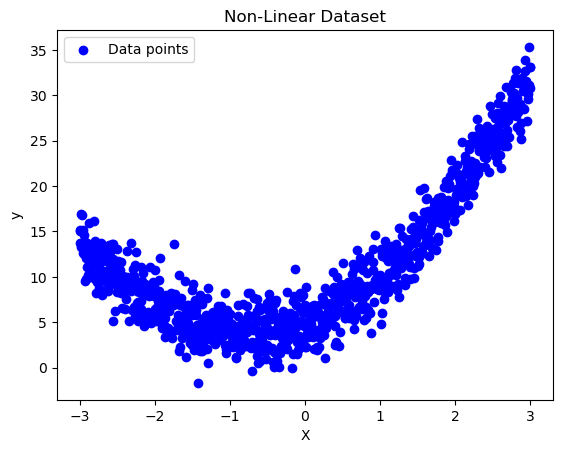

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.linspace(-3, 3, 1_000).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 2, X.shape)

plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-Linear Dataset')
plt.legend()
plt.show()


### **Step 1**

You should implement a custom regression class using the template below that does the following:
- Parameters: Accepts a flag to include a constant (intercept) or not.
- Fit: Estimate the OLS parameters using the formulas
$$\widehat a = \frac{\sum\limits_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^n (x_i - \bar{x})^2}, \quad 
    \widehat b = \bar{y} - \widehat a \bar{x}.$$
- Predict: Compute predictions using the estimated parameters.
- Residuals: Return the residuals, defined as:
$$ residuals = y − \widehat y $$

In [5]:
class CustomLinearRegression:
    def __init__(self, use_intercept=True):
        self.use_intercept = use_intercept
        self.coef_ = None
        self.intercept_ = 0
    
    def fit(self, X, y):
        # YOUR CODE GOES HERE
        if self.use_intercept:
            X = np.c_[np.ones(X.shape[0]), X]
        
        # Closed-form solution
        X_transpose = X.T
        self.coef_ = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
        
        if self.use_intercept:
            self.intercept_ = self.coef_[0]
            self.coef_ = self.coef_[1:]
            pass
    def predict(self, X):
        # YOUR CODE GOES HERE
        if self.use_intercept:
            return self.intercept_ + np.dot(X, self.coef_)
        else:
            return np.dot(X, self.coef_)
        pass
    def residuals(self, X, y):
        # YOUR CODE GOES HERE
        return y - self.predict(X)
        pass

### Step 2
- Split the dataset into training and testing sets
- Use your custom linear regression class to fit the model

In [6]:
# YOUR CODE GOES HERE
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CustomLinearRegression()
model.fit(X_train, y_train)

### Step 3
- Compute predictions for the test data.

In [7]:
# YOUR CODE GOES HERE
y_pred = model.predict(X_test)
y_pred

array([[11.47601765],
       [15.34993478],
       [15.40373918],
       [13.96895506],
       [ 9.50318948],
       [14.29178149],
       [13.35917181],
       [11.33253923],
       [17.53798057],
       [ 4.57111905],
       [16.67711009],
       [ 3.49503096],
       [13.53851982],
       [19.58254794],
       [18.95482989],
       [18.25537263],
       [ 7.15373048],
       [17.9684158 ],
       [15.78037002],
       [ 7.85318774],
       [11.97819209],
       [ 5.25264151],
       [ 8.78579742],
       [11.58362646],
       [ 5.89829437],
       [ 6.34666441],
       [ 3.943401  ],
       [19.81570036],
       [18.30917703],
       [19.1162431 ],
       [ 8.33742738],
       [ 4.62492346],
       [13.2694978 ],
       [11.08145201],
       [ 8.76786261],
       [ 5.68307675],
       [14.4531947 ],
       [12.60591014],
       [18.29124223],
       [ 3.19013934],
       [ 8.01460095],
       [ 3.85372699],
       [ 7.72764412],
       [19.60048274],
       [ 7.4944917 ],
       [ 7

### Step 4

- Plot the actual data points and overlay the regression line from your custom model.

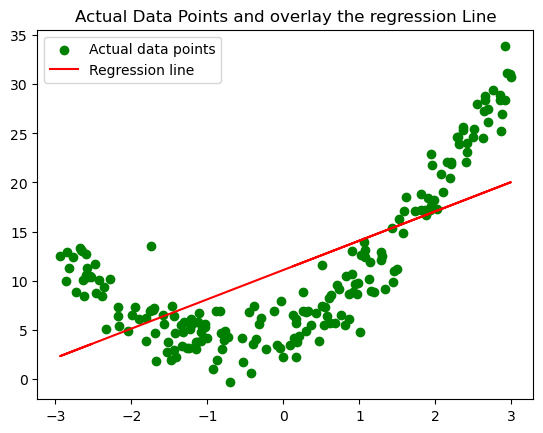

In [8]:
# YOUR CODE GOES HERE
plt.scatter(X_test, y_test, color='green', label='Actual data points')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('Actual Data Points and overlay the regression Line')
plt.legend()
plt.show()

### Step 5
- Create a plot of residuals 
- Are the residuals randomly dispersed around zero?
- What does the pattern (or lack thereof) tell you about the appropriateness of a linear model for this dataset?

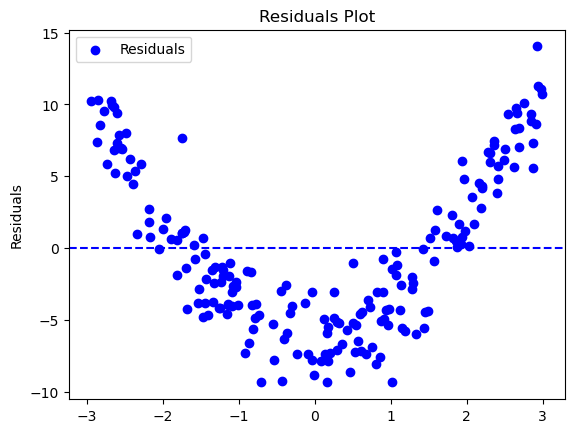

In [9]:
# YOUR CODE GOES HERE
residuals = model.residuals(X_test, y_test)

plt.scatter(X_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='blue', linestyle='--')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

### Step 6

- Use sklearn to implement Polynomial Regression and fit it on the same dataset.
- Compare the results.

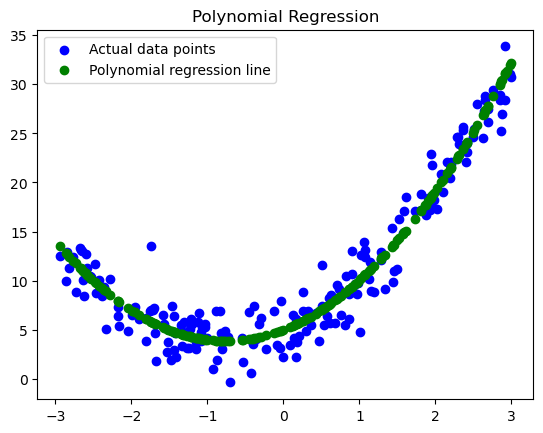

In [10]:
# YOUR CODE GOES HERE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_poly_pred = poly_model.predict(X_poly_test)

# Plot the actual data points and the polynomial regression line
plt.scatter(X_test, y_test, color='blue', label='Actual data points')
plt.scatter(X_test, y_poly_pred, color='green', label='Polynomial regression line')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

### Final Discussion

- Discuss how the linear model may underfit the data because it cannot capture the inherent non-linear relationships
- Explain how introducing polynomial terms leads to a better fit